In [29]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [30]:
def polynomial_regression(x, y, degree_my = 1):
  """
  Return R^2, coefficients and the interception
  
  polynomial_regression(x, y, degree_my = 1) -> (r_sq, coefficients, interception)

  Parameters
  ----------
  x: np.array, regressors
  y: np.array, predictors
  degree: int, optional, default 1, the degree of the model function
  
  Examples
  --------
  >>> x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
  >>> y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])

  >>> x
  array([[16],
         [17],
         [23],
         [25],
         [28],
         [31],
         [40],
         [48],
         [54],
         [67]])
  >>> y
  array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])
  >>> polynomial_regression(x, y)
  (0.9141779810921304, array([-0.88693692]), 187.95409848808737)
  >>> polynomial_regression(x, y, 2)
  (0.9147602910606555, array([-1.01045344,  0.00153909]), 189.99421074646295)
  >>> polynomial_regression(x, y, 5)
  (0.9184131002053144, array([ 7.73620330e+00, -4.45581354e-01,  1.08361046e-02, -1.26584517e-04,
          5.75609467e-07]), 126.4417938766303)
  >>> 
  """
  transformer = PolynomialFeatures(degree = degree_my, include_bias = False)
  transformer.fit(x)
  x_ = transformer.transform(x)

  model = LinearRegression().fit(x_, y)
  
  coefficient_of_determination = model.score(x_, y)
  interception = model.intercept_
  coefficients = model.coef_

  return (coefficient_of_determination, coefficients, interception)

In [31]:
def linear_regression(x, y):
    '''
    returns R^2, slop, and intercept
    '''
    return polynomial_regression(x, y, 1)

In [32]:
def linear_regression_output(r_sq, slope, intercept, prediction_function):
#     coefficient_of_determination = r_sq
    print('The linear regression model is y = %.2f*x + %.2f' % (slope, intercept))
    age = int(input('what is your age: '))
    print('your recommended HR is %d' % (prediction_function(age)))
    print('This is %.2f percent accurate' % (r_sq * 100))

In [33]:
def quadratic_regression(x, y):
    return polynomial_regression(x, y, 2)

In [34]:
def quadratic_regression_output(r_sq, coeff, intercept, prediction_function):

  print('The quadratic regression model is y = %.4f*x^2 + %.4f*x + %.4f' % (coefficients[-1], coefficients[-2], interception))

  age = int(input('what is your age: '))
  print('your recomended HR is %d' % (prediction_function(age)))
  print('this is %.2f percent accurate' %( coefficient_of_determination * 100) )

In [78]:
def viz_polynomial(x, y):
    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(x)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('heart rate prediction based on age')
    plt.xlabel('age')
    plt.ylabel('heart rate')
    plt.show()

In [79]:
# obtained the data from
# https://johnstonmd.wordpress.com/teaching/math-178-spring-2017/
x = np.array([16, 17, 23, 25, 28, 31, 40, 48, 54, 67]).reshape((-1, 1))
y = np.array([180, 163, 172, 168, 165, 156, 153, 144, 139, 130])

Text(0, 0.5, 'heart rate')

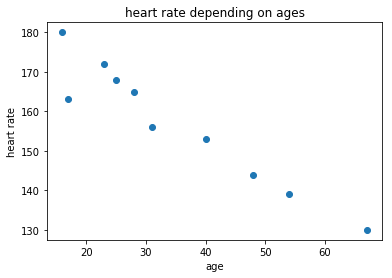

In [80]:
plt.scatter(x, y)
plt.title("heart rate depending on ages")
plt.xlabel("age")
plt.ylabel("heart rate")

In [81]:
quadratic_regression(x, y)

(0.9147602910606554, array([-1.01045344,  0.00153909]), 189.99421074646295)

Text(0.5, 1.0, 'regression plot')

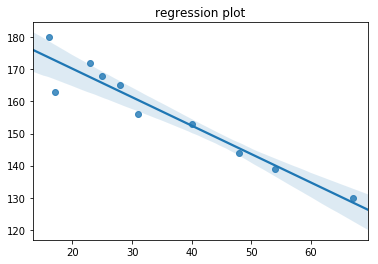

In [82]:
sns.regplot(x, y, data=[x,y])
plt.title("regression plot")

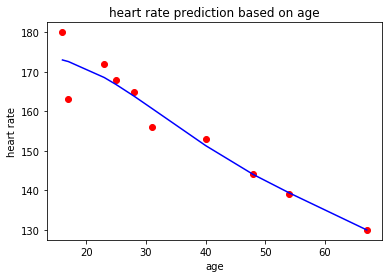

In [83]:
viz_polynomial(x, y)